In [22]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Session 01

## Implementation of MP Neuron.

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

## 1. Import Statements
Import all the libraries.

## 2. Setup Global Parameters

In [23]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score  # Import function to calculate various metric

In [24]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
inpDir = Path('..') / '..' / 'input'
# outDir = '../output'
outDir = Path('..') / 'output'


RANDOM_STATE = 24 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE  = 0.2 # Size of test data

# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## 3. Load Data Set

<div class="alert alert-block alert-info" style="font-family: Arial; font-size:1.1em;">
This data is generated from SKLearn Breast Cancer data.
</div>

In [25]:
# read CSV from the disk
data_df = pd.read_csv(inpDir/ 'breast_cancer_mod.csv')
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
565,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
566,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
567,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [26]:
data_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

###  Class Distribution
212 - Malignant, 357 - Benign

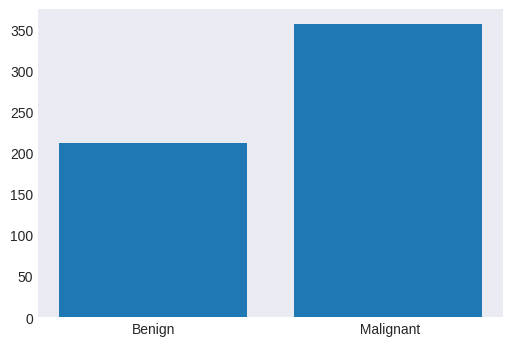

In [27]:
# create list of labels
labels = [' Malignant', 'Benign']

# instantiate figure and axis
fig, ax = plt.subplots(figsize=(6,4))

# plot bars on the axis
ax.bar(data_df['target'].value_counts().index, data_df['target'].value_counts().values)

# Set custom x-axis tick labels
ax.set_xticks(data_df['target'].value_counts().index)

# Add label text
ax.set_xticklabels(labels)

ax.grid();

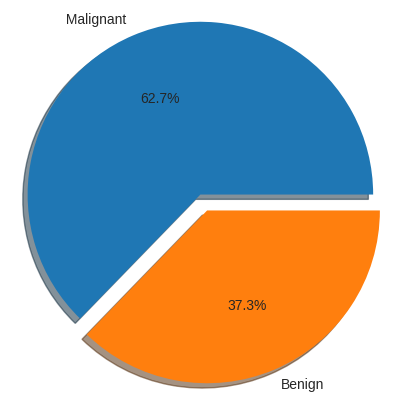

In [28]:
fig, ax = plt.subplots(figsize = (5,5))

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. '1')

ax.pie(data_df['target'].value_counts(), 
       explode=explode, 
       labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=0)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [29]:
features = data_df.drop('target', axis = 1)
labels = data_df['target']

In [30]:
# Split X and y in train and test sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels, 
                                                    test_size=TEST_SIZE, # proportion to include in the test split
                                                    stratify = labels,  # split in a stratified fashion, using this as the class labels
                                                    random_state=RANDOM_STATE) # set the random state

# what does shape look like
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(455, 30) (455,) (114, 30) (114,)


# Over to MP Neurons
<img src='../../images/dnn_nb_s01_fig1.jpg' width='350' />

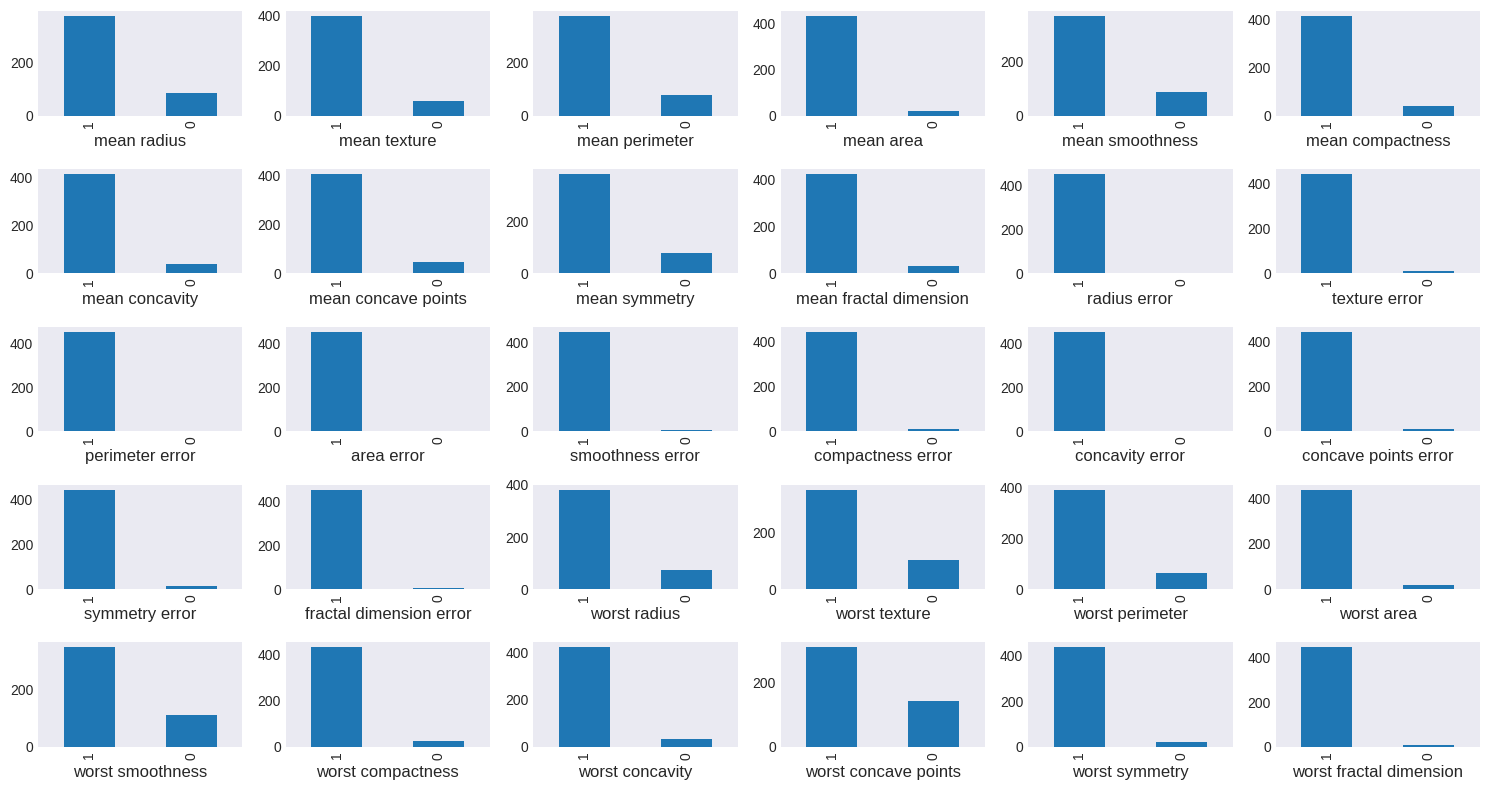

In [31]:
# Plot Training data

fig, axes = plt.subplots(5,6, figsize = (15, 8)) # 5 x 6 = 30 columns

axes = axes.ravel() # convert 2d Array to single dimension

# Iterate all columns and plot individually
for i, col in enumerate(X_train.columns):
    
    ax = X_train[col].value_counts().plot(ax=axes[i], kind='bar');
    
    ax.grid()

plt.tight_layout()

## Training Data

In [32]:
 # create a column with sums
X_train['total'] = X_train.astype(np.int16).sum(axis=1) # convert to integer from object

X_train['target'] = y_train # target column from y_train

X_train.sort_values('total', inplace = True) # sort the values as per total

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
8,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0


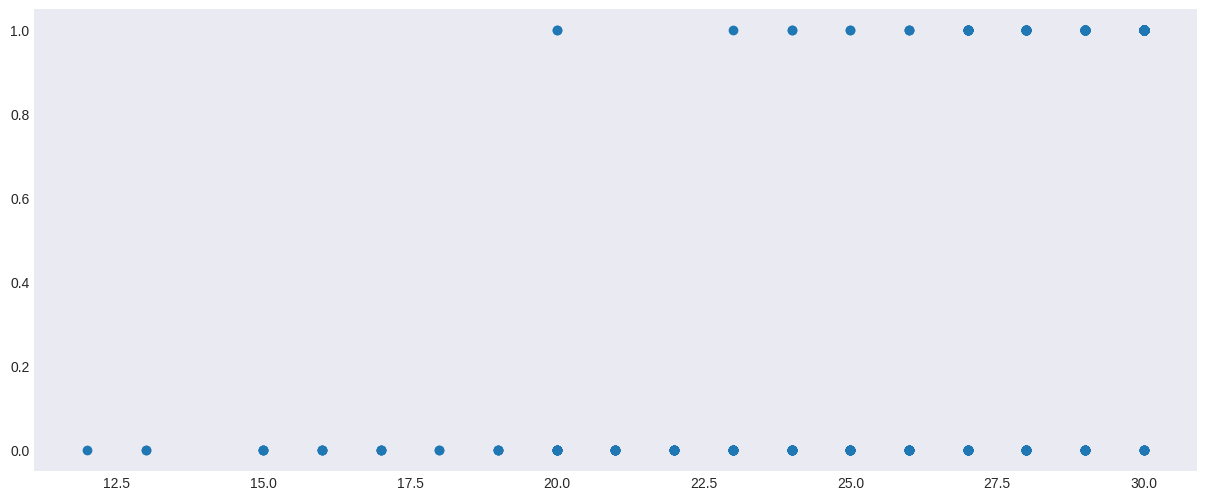

In [33]:
plt.scatter(X_train['total'], X_train['target']);
plt.grid()

In [34]:
# convert to log(odd of target) = np.log(p/(1-p))
# 0.5, 0.731, 1

probs = [1e-8, 0.5, 0.731, 1-1e-8 ]
for prob in probs:
    print ( np.log2 ( prob /(1-prob)) )


-26.57542474467195
0.0
1.4422652333958133
26.575424737422754


## Test Data

In [35]:
# Reapeat the above steps with test dataset
X_test['total'] = X_test.astype(np.int16).sum(axis=1)

X_test['target'] = y_test

X_test.sort_values('total', inplace = True)

X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
12,0,0,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,16,0
18,1,1,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,18,0
35,0,1,0,0,1,1,0,0,1,1,...,0,0,0,1,1,0,1,1,20,0


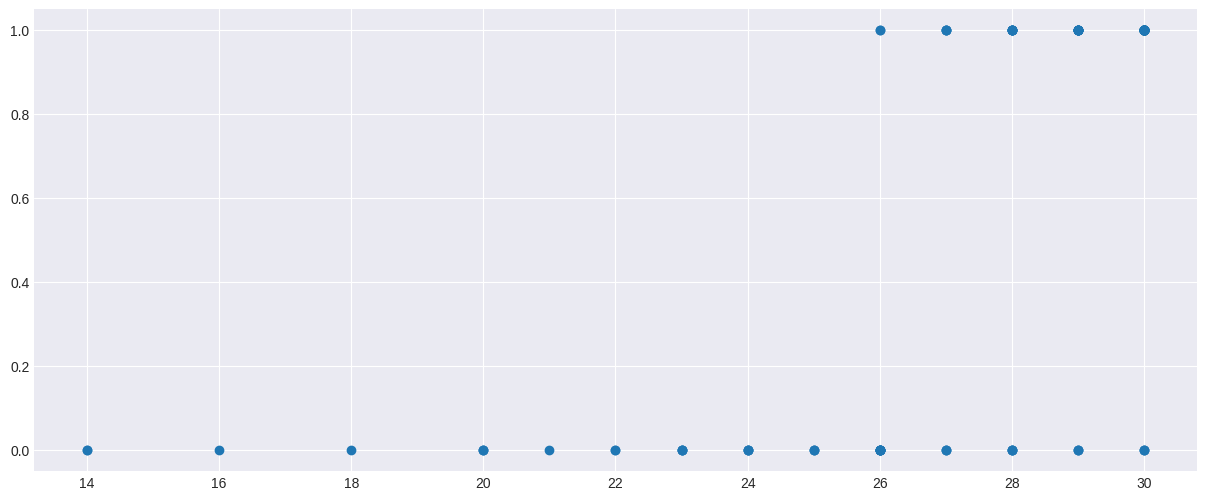

In [36]:
plt.scatter(X_test['total'], X_test['target']);

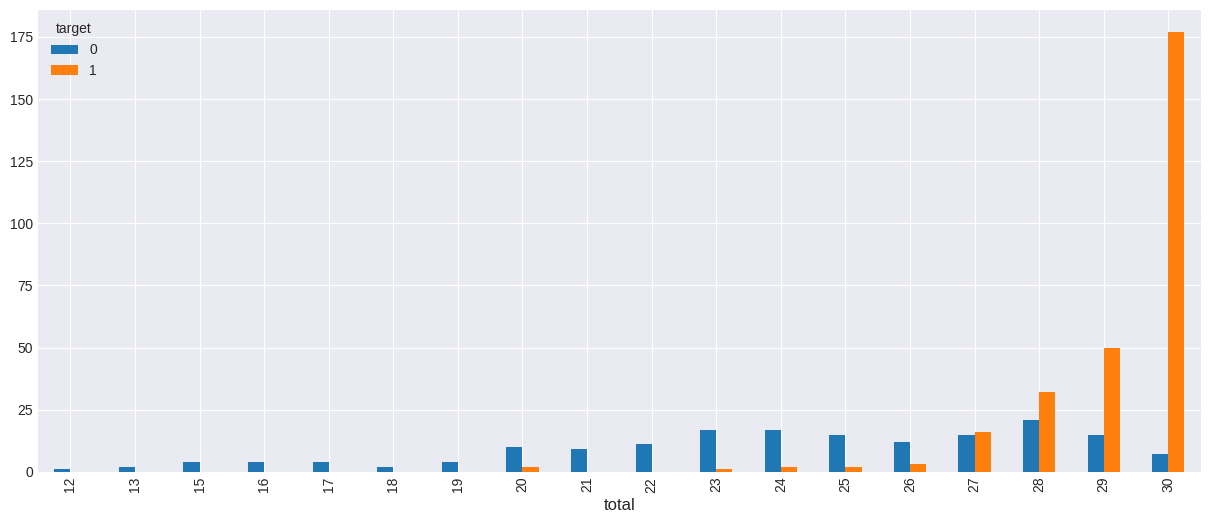

In [37]:
# plot Count of totals in the train set
tmp_df = X_train.groupby(['total', 'target']).agg({'target': 'count'}) # Create a tmp DataFrame

tmp_df.columns = ['count'] # rename column

tmp_df.reset_index(inplace = True) # reset index helps

tmp_df.pivot(index='total', columns='target', values='count').plot(kind = 'bar'); # create a pivot and plot

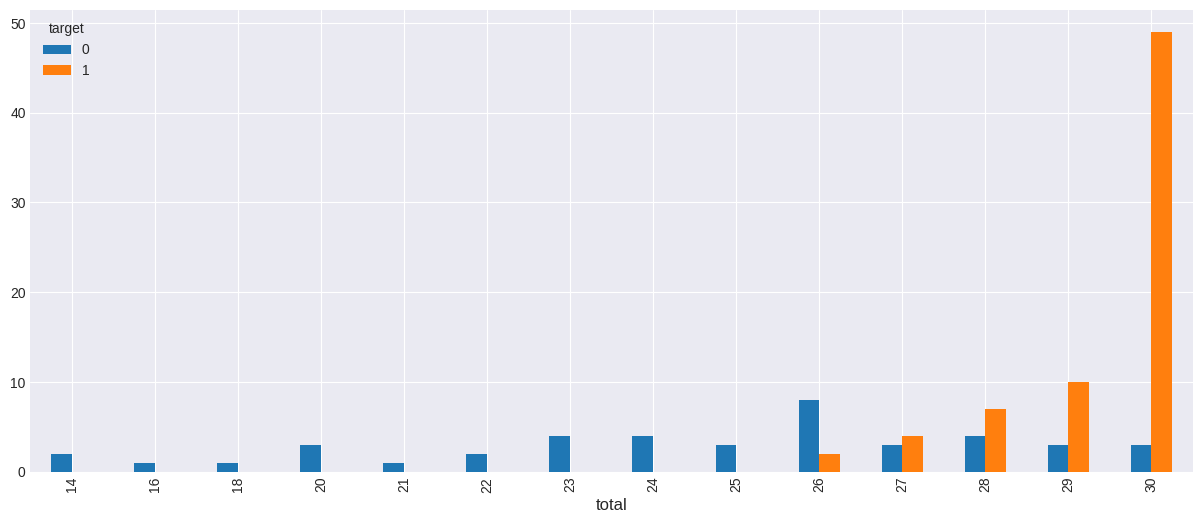

In [38]:
# repeat for test set

tmp_df = X_test.groupby(['total', 'target']).agg({'target': 'count'})

tmp_df.columns = ['count']

tmp_df.reset_index(inplace = True)

tmp_df.pivot(index='total', columns='target', values='count').plot(kind = 'bar');

In [39]:
# Calculate accuracy
accuracy = {}

# loop over the rows

for b in range(X_train.shape[1]):
    
    X_train['y_pred'] = X_train['total'] >= b # make prediction based on total
    
    accuracy[b] = accuracy_score(X_train['y_pred'], X_train['target']) # calculate accuracy

In [40]:
best_b = max(accuracy, key = accuracy.get) # find best accuracy

print('Optimal value of b is', best_b)

print('Highest accuracy is: {0:4.2f} %'.format(accuracy[best_b] *100))

Optimal value of b is 27
Highest accuracy is: 85.05 %


In [41]:
# Using best b calculate accuracy on test set

X_test['y_pred'] = X_test['total'] >= best_b

test_accuracy = accuracy_score(X_test['y_pred'], X_test['target'])

print ('Accuracy of testing is: {0:4.2f} %'.format(test_accuracy*100))

Accuracy of testing is: 86.84 %


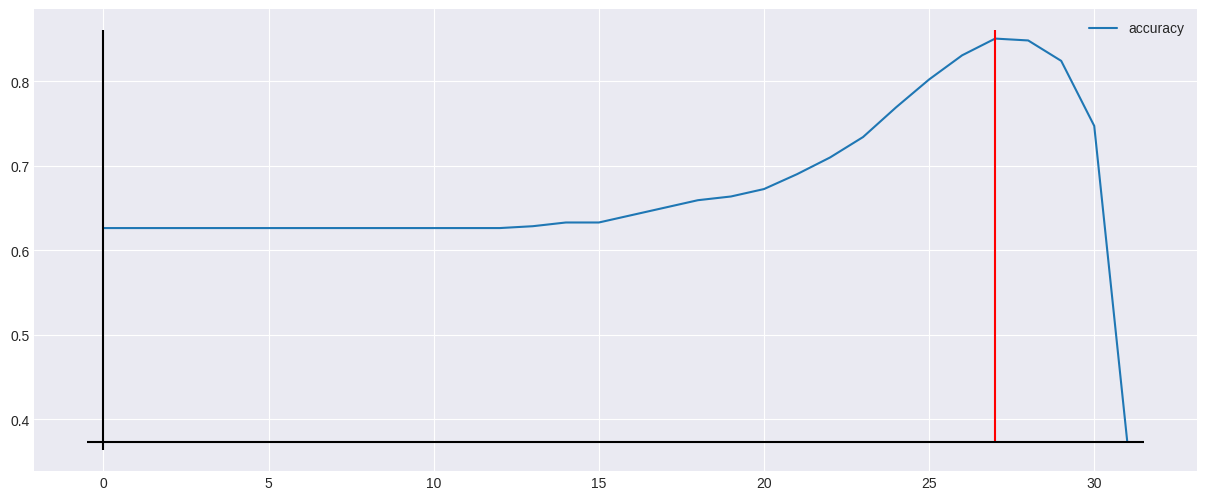

In [42]:
# plot results
ax = pd.DataFrame([accuracy], index = ['accuracy']).T.plot()

ax.vlines( x=best_b, ymin=min(accuracy.values()), ymax=accuracy[best_b]+0.01, colors='r')

ax.vlines( x = 0, ymin=min(accuracy.values())-0.01, ymax=accuracy[best_b]+0.01, colors='k')

ax.hlines( y=min(accuracy.values()), xmin=min(accuracy.keys())-0.5, xmax=max(accuracy.keys())+0.5, colors='k');